linear regression(일반적인 optimal solution X. optimal sol closed form으로 존재하지만 현실적으로 optimal solution에 존재하는 다양한 matrix computation (ex.행렬 곱셈, inverse 연산) 때문에 비현실적. 대안책 : GDM

-> linear regression의 weight parameter를 GDM를 통해서 학습하는 과정

(1) pytorch 활용하지 않고, 직접 gradient 다 구해서 w update (딥러닝 어떻게 학습하는지 이해하는데 도움.) -numpy 기반 w parameter 학습 과정

In [ ]:
import numpy as np #for 연산
import matplotlib.pyplot as plt #for visulization

In [ ]:
#linear regression을 가정한 임의의 데이터(toy data) - 1000개의 2차원 plain에 존재

num_sample = 1000
min_val, max_val = 0., 5. #x값에 해당하는 범위 0~5로 가정하고, uniform random sampling을 통해서 x dimensional data 생성
x_data = np.random.uniform(low=min_val, high=max_val, size=num_sample)
y_data = 3 * x_data + 2 + np.random.randn(num_sample) #y=3*x+2 형태의 분포를 따른다고 가정하고 y data 생성 +random gaussian noise 추가
data = np.transpose(np.array([x_data,y_data]))

print(data.shape)

(1000, 2)


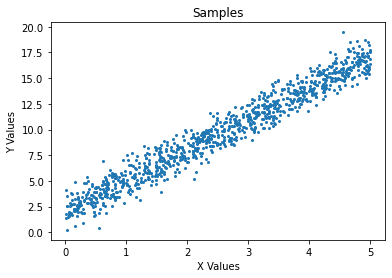

In [ ]:
#생성한 data plotting
plt.title("Samples")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.scatter(data[:,0], data[:,1],s=4)
plt.show()

In [ ]:
#optimal sol(weight, bias) by matrix 연산
data_ = np.transpose(np.array([x_data,np.ones_like(x_data)]))

optimal = np.matmul(np.matmul(np.linalg.inv(np.matmul(data_.T, data_)), data_.T), data[:,1])

print(optimal)


[2.99886992 2.05324388]


In [ ]:
#Gradient Descend Method
#1. parameter random initialization & learning rate 정의

w, b = np.random.randn(2) #standard gaussian에서 random sampling을 통해서 initialization
eta = 1e-5 #learning rate(step size)

In [ ]:
#2. loss와 gradient 구하기
#데이터 하나가 들어왔을 때 그때의 loss와 gradient 구하기
def compute_loss_and_grad(data_instance):
    x, y = data_instance #unpacking
    y_est = w*x + b #y estimated 값
    loss = (y-y_est)**2 #loss=(true y-estimated y)^2 != MSE (엄밀하게) but 수식적으로 생각해보면 SE나 SSE로 optimization 하든 MSE로 하든 스케일을 제외하면 달라질게 없음
    #so 편의상 SE를 모두 sum 하는 걸 total loss로 생각
    grad_w = -2*(y-y_est)*x #w에 대한 gradient(수직적 계산은 손으로 한 번 해보기)
    grad_b = -2*(y-y_est) #b에 대한 gradient
    return loss, (grad_w, grad_b)

#학습할 w,b, 이에 대한 gradient값 알았으니까 실제로 w,b 학습. parameter update하는 function
def update_parameters(grads):
    global w, b #글로벌하게 정의된 w,b를 update할 거니까 글로벌 선언 해줘야!
    grad_w, grad_b = grads #그레디언트 뭉텅이로 들어온 거 unpacking
    w -= eta * grad_w #기존의 w에 learning rate*grad value 만큼 빼주도록
    b -= eta * grad_b

In [ ]:
#3. learning stage

num_epoch = 2000 #몇번의 iteration 돌릴지 setting. (hyperparameter이기 때문에 직접 딥러닝 개발 혹은 구현할 때 어느 정도 학습을 해야할지 등은 실험적으로 알아봐야)
loss_list = list() #각 iteration(=epoch)에서 어떤 loss값들이 나오는지 saving하기 위한 loss에 대한 list initialize

for i in range(num_epoch):
    perm = np.random.permutation(len(data)) #SGD 중 batch size 1인 simple SGD 사용할 것이므로, 데이터 길이만큼 random permutation 매 epoch마다 정의해줘야(이번 epoch에서는 어떤 순서대로 데이터 instance feeding해서 학습해나갈 것인지 의미)
    total_loss = 0 #해당 epoch에서 총 loss 얼마인지 계산하기 위한 토탈 loss setting
    for j in range(len(data)):
        loss, grads = compute_loss_and_grad(data[perm[j]]) #각각의 data instance 하나마다 loss와 grad compute 뭉텅이로
        update_parameters(grads)
        total_loss += loss #누적
    loss_list.append(total_loss) #해당 epoch에서의 total loss(나중에 loss 어떻게 수렴했는지 보기 위해서)

    
    if i % 10 == 0:
        print("Epoch %d: %.3f"%(i,total_loss)) #매 10번의 epoch마다 해당 epoch의 loss 프린트해주는 형태로 코드 구현 

Epoch 0: 32522.483
Epoch 10: 3033.018
Epoch 20: 2220.211
Epoch 30: 2095.490
Epoch 40: 1996.248
Epoch 50: 1905.946
Epoch 60: 1823.416
Epoch 70: 1747.983
Epoch 80: 1679.038
Epoch 90: 1616.007
Epoch 100: 1558.413
Epoch 110: 1505.779
Epoch 120: 1457.659
Epoch 130: 1413.679
Epoch 140: 1373.491
Epoch 150: 1336.734
Epoch 160: 1303.165
Epoch 170: 1272.479
Epoch 180: 1244.427
Epoch 190: 1218.787
Epoch 200: 1195.353
Epoch 210: 1173.933
Epoch 220: 1154.360
Epoch 230: 1136.461
Epoch 240: 1120.081
Epoch 250: 1105.161
Epoch 260: 1091.494
Epoch 270: 1079.017
Epoch 280: 1067.601
Epoch 290: 1057.170
Epoch 300: 1047.626
Epoch 310: 1038.911
Epoch 320: 1030.956
Epoch 330: 1023.674
Epoch 340: 1017.023
Epoch 350: 1010.942
Epoch 360: 1005.380
Epoch 370: 1000.303
Epoch 380: 995.658
Epoch 390: 991.415
Epoch 400: 987.536
Epoch 410: 983.991
Epoch 420: 980.737
Epoch 430: 977.786
Epoch 440: 975.070
Epoch 450: 972.606
Epoch 460: 970.344
Epoch 470: 968.278
Epoch 480: 966.388
Epoch 490: 964.654
Epoch 500: 963.081
Epo

loss 한 점으로 수렴해가고 있음을 알 수 있음
= 2000번 다 돌릴 필요 없이 적당히 1000번쯤 돌리고 코드 끝내도 되는 거였음
but 어떻게 linear regression 학습되는지 확인한다는 차원에서 2000번 돌린거라고 생각하시길...

In [ ]:
print(w,b)

2.9988865638983957 2.0529058663664284


In [ ]:
#optimal w, b 값과 크게 차이 없음. 심지어 처음에 가정했던 y=3*x+2의 w,b 값들과도 큰 차이 X = GDM로 학습을 해도 optimal sol과 굉장히 가깝게 parameter 학습되는구나~
print(optimal)

[2.99886992 2.05324388]


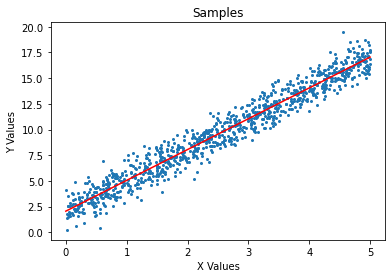

In [ ]:
#GDM으로 얻어낸 parameter를 통해서 실제로 linear relationship plot 해봄 -> 잘 fitting(애초에 이런 관계를 가진 데이터 포인트들을 뽑았으므로..)

plt.title("Samples")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.scatter(data[:,0], data[:,1],s=4)
plt.plot([min_val, max_val], [w*min_val+b, w*max_val+b],color="r")
plt.show()

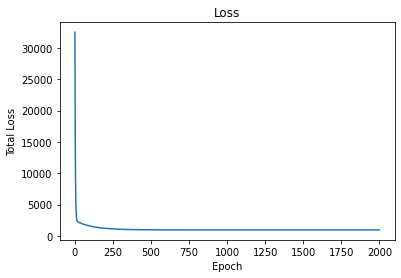

In [ ]:
#saving loss들. 데이터가 잘 fitting 하므로 loss가 처음부터 확확 떨어지면서 나중에 결국 수렴하는 형태임. 만약 모델이 좀 더 복잡했다던가, 데이터들이 단순히 linear relationship 아니였다면 loss가 이런식으로 빠르게 수렴하지는 않았을것
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Total Loss")
plt.plot(loss_list)
plt.show()


In [ ]:
#linear regression에 이렇게 fit하지 않은 다른 데이터를 활용해서 같은 코드 진행. (데이터 생성하는 부분만 앞선 코드와 다름)

In [ ]:
num_sample = 1000
min_val, max_val = 0., 5.

x_data = np.random.uniform(low=min_val, high=max_val, size=num_sample)
y_data = np.sin(x_data) #y=sin(x) 가정

data = np.transpose(np.array([x_data,y_data]))

print(data.shape)

(1000, 2)


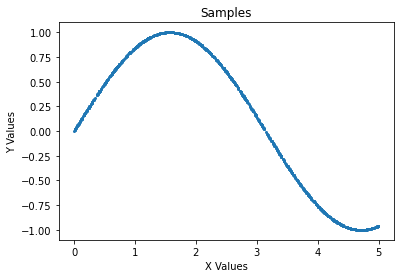

In [ ]:
#sin 함수 형태로 데이터 존재 
plt.title("Samples")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.scatter(data[:,0], data[:,1],s=4)
plt.show()

In [ ]:
#optimal sol by 단순계산
data_ = np.transpose(np.array([x_data,np.ones_like(x_data)]))

optimal = np.matmul(np.matmul(np.linalg.inv(np.matmul(data_.T, data_)), data_.T), data[:,1])

print(optimal)

[-0.40338784  1.15871901]


In [ ]:
#initialization
w, b = np.random.randn(2)
eta = 1e-5

In [ ]:
def compute_loss_and_grad(data_instance):
    x, y = data_instance
    y_est = w*x + b
    loss = (y-y_est)**2
    grad_w = -2*(y-y_est)*x
    grad_b = -2*(y-y_est)
    return loss, (grad_w, grad_b)

def update_parameters(grads):
    global w, b
    grad_w, grad_b = grads
    w -= eta * grad_w
    b -= eta * grad_b

In [ ]:
#학습
num_epoch = 2000
loss_list = list()

for i in range(num_epoch):
    perm = np.random.permutation(len(data))
    total_loss = 0
    for j in range(len(data)):
        loss, grads = compute_loss_and_grad(data[perm[j]])
        update_parameters(grads)
        total_loss += loss
    loss_list.append(total_loss)
    
    if i % 10 == 0:
        print("Epoch %d: %.3f"%(i,total_loss))


Epoch 0: 813.513
Epoch 10: 618.662
Epoch 20: 575.279
Epoch 30: 539.497
Epoch 40: 506.994
Epoch 50: 477.380
Epoch 60: 450.390
Epoch 70: 425.801
Epoch 80: 403.394
Epoch 90: 382.975
Epoch 100: 364.368
Epoch 110: 347.413
Epoch 120: 331.962
Epoch 130: 317.883
Epoch 140: 305.053
Epoch 150: 293.364
Epoch 160: 282.711
Epoch 170: 273.001
Epoch 180: 264.158
Epoch 190: 256.097
Epoch 200: 248.751
Epoch 210: 242.058
Epoch 220: 235.958
Epoch 230: 230.401
Epoch 240: 225.338
Epoch 250: 220.722
Epoch 260: 216.518
Epoch 270: 212.686
Epoch 280: 209.194
Epoch 290: 206.012
Epoch 300: 203.112
Epoch 310: 200.467
Epoch 320: 198.062
Epoch 330: 195.869
Epoch 340: 193.869
Epoch 350: 192.046
Epoch 360: 190.386
Epoch 370: 188.874
Epoch 380: 187.496
Epoch 390: 186.241
Epoch 400: 185.096
Epoch 410: 184.053
Epoch 420: 183.103
Epoch 430: 182.237
Epoch 440: 181.447
Epoch 450: 180.728
Epoch 460: 180.073
Epoch 470: 179.476
Epoch 480: 178.932
Epoch 490: 178.436
Epoch 500: 177.983
Epoch 510: 177.572
Epoch 520: 177.197
Epoc

대충 173 근처에서 loss가 saturate되는 것을 알 수 있음 => 대충 1000번쯤 iteration 멈추는게 맞았음

In [ ]:
#optimal, GDM 결과 비슷함 (크게 다르지 않음을 실험적으로 알 수 있음!)
print(w,b)
print(optimal)

-0.40336505196464284 1.158615707842584
[-0.40338784  1.15871901]


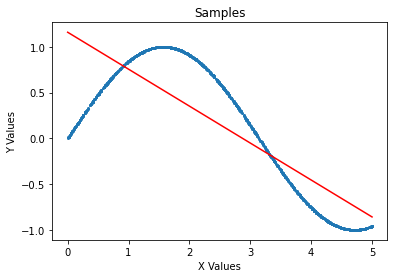

In [ ]:
plt.title("Samples")
plt.xlabel("X Values")
plt.ylabel("Y Values")
plt.scatter(data[:,0], data[:,1],s=4)
plt.plot([min_val, max_val], [w*min_val+b, w*max_val+b],color="r")
plt.show()

sin function을 정확하게 모델링하지는 못하지만, 이 데이터의 linear relationship을 가장 잘 모델링하는 라인이 다음과 같이 그려진 것.

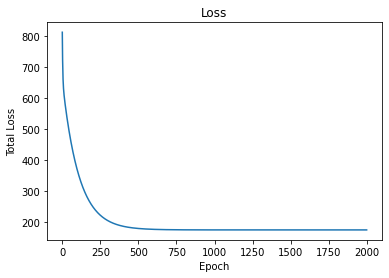

In [ ]:
#loss function
plt.title("Loss")
plt.xlabel("Epoch")
plt.ylabel("Total Loss")
plt.plot(loss_list)
plt.show()

아까와는 다르게 extreme하게 수렴하지 않고, 곡선형태로 어느 정도 epoch이 지나가야 수렴하는 것을 확인할 수 있음
(데이터가 linear regression에 fit한 데이터가 아니기 때문에 w,b 이 학습되는데 어느 정도 시간이 걸렸음을 의미)